# **<center>Stock Price Prediction with Technical & Fundamental Analysis</center>**
**Stock**
* Stocks, each unit of which is called a share, represent ownership of a company. Stocks, owned either directly or through a mutual fund or ETF, will likely form the majority of most investor's portfolios. 

In [1]:
!pip install yfinance==0.2.12
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import datetime
import warnings
warnings.filterwarnings('ignore')

   ---------------------------------------- 0.0/59.2 kB ? eta -:--:--
   ---------------------------------------- 59.2/59.2 kB 3.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/112.2 kB ? eta -:--:--
   ---------------------------------------- 112.2/112.2 kB 6.8 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.53
    Uninstalling yfinance-0.2.53:
      Successfully uninstalled yfinance-0.2.53


In [2]:
ticker = "ADANIENT.NS"

try:
    df = yf.download(ticker, period="5y")  # Fetch last 5 years' data
except Exception as e:
    print(f"Error fetching data: {e}")
    exit()

if df.empty or df["Close"].isnull().all():
    print("Stock data is unavailable for this period.")
    exit()

[*********************100%***********************]  1 of 1 completed


In [3]:
df.sort_values(by ='Date', ascending = False).head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2025-02-17,2152.649902,2240.399902,2110.649902,2223.699951,2223.699951,1400059
2025-02-14,2245.699951,2249.300049,2124.550049,2152.649902,2152.649902,2549876
2025-02-13,2354.000000,2372.750000,2233.399902,2244.699951,2244.699951,2551665
2025-02-12,2325.000000,2378.449951,2281.000000,2353.449951,2353.449951,1933098
2025-02-11,2312.000000,2397.000000,2306.000000,2321.750000,2321.750000,4895456


### **Key Definitions**
**Open:** The opening price of a stock at the beginning of a trading day.

**High:** The highest price a stock reaches during a trading day.

**Low:** The lowest price a stock reaches during a trading day.

**Close:** The closing price of a stock at the end of a trading day.

**Adj Close:** The adjusted closing price of a stock, which takes into account any dividends, stock splits, or other corporate actions that occurred during the day.

**Volume:** The number of shares of a stock that were traded during a particular trading day. This is an important indicator of market activity and can provide insight into the level of buying and selling interest in a particular stock.

In [16]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2025-02-10,2350.000000,2350.949951,2280.100098,2290.800049,2290.800049,739708
2025-02-11,2312.000000,2397.000000,2306.000000,2321.750000,2321.750000,4895456
2025-02-12,2325.000000,2378.449951,2281.000000,2353.449951,2353.449951,1933098
2025-02-13,2354.000000,2372.750000,2233.399902,2244.699951,2244.699951,2551665
2025-02-14,2245.699951,2249.300049,2124.550049,2152.649902,2152.649902,2549876


In [17]:
df.shape

(1240, 6)

* There are approximately 252 trading days in an year with an average of 21 days per month, or 63 days per quarter. Out of a possible 365 days, 104 days are weekends (Saturday and Sunday) when the stock exchanges are closed.

**High-level overview of how the Adani Enterprises stock performed in about last couple of months** 

## **Trend Analysis**
**Trend is determined from below relationship —**
<center>
<table>
  <tr>
    <th>Daily Percentage Change</th>
    <th>Trend</th>
  </tr>
  <tr>
    <td>-0.5 to 0.5</td>
    <td>Slight or No Change</td>
  </tr>
  <tr>
    <td>0.5 to 1</td>
    <td>Slight Positive</td>
  </tr>
  <tr>
    <td>-0.5 to -1</td>
    <td>Slight Negative</td>
  </tr>
  <tr>
    <td>1 to 3</td>
    <td>Positive</td>
  </tr>
  <tr>
    <td>-1 to -3</td>
    <td>Negative</td>
  </tr>
  <tr>
    <td>3 to 7</td>
    <td>Among Top Gainers</td>
  </tr>
  <tr>
    <td>-3 to -7</td>
    <td>Among Top Losers</td>
  </tr>
  <tr>
    <td>Above 7</td>
    <td>Bull Run</td>
  </tr>
  <tr>
    <td>Below 7</td>
    <td>Bear Drop</td>
  </tr>
</table>
</center>

In [41]:
def trend(x):
  if x > -0.5 and x <= 0.5:
    return 'Slight or No change'
  elif x > 0.5 and x <= 1:
    return 'Slight Positive'
  elif x > -1 and x <= -0.5:
    return 'Slight Negative'
  elif x > 1 and x <= 3:
    return 'Positive'
  elif x > -3 and x <= -1:
    return 'Negative'
  elif x > 3 and x <= 7:
    return 'Among top gainers'
  elif x > -7 and x <= -3:
    return 'Among top losers'
  elif x > 7:
    return 'Bull run'
  elif x <= -7:
    return 'Bear drop'
df['Trend']= np.zeros(df['Day_Perc_Change'].count())
df['Trend']= df['Day_Perc_Change'].apply(lambda x:trend(x))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Day_Perc_Change,Trend
Date,,,,,,,,,
2020-02-17,2020-02-17,256.899994,257.399994,251.649994,252.500000,250.042526,2411524,-1.424950,Negative
2020-02-18,2020-02-18,251.649994,251.649994,245.250000,249.449997,247.022186,2430446,-1.207931,Negative
2020-02-19,2020-02-19,250.000000,255.500000,249.899994,254.000000,251.527924,2101729,1.824021,Positive
2020-02-20,2020-02-20,253.199997,261.000000,252.649994,258.649994,256.132690,3108173,1.830718,Positive
2020-02-24,2020-02-24,254.800003,255.850006,244.100006,247.250000,244.843613,3309214,-4.407511,Among top losers


### **Pie chart**

**Past 13 years trend**

##### plt.figure(figsize=(20,5))
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(df['Trend'].value_counts(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

* For the 13 yeras period, the ADANI Enterprise stock was among the top gainers for about 20.9% of the time, and among the top losers for 20.9 %. 
* For about 8.1% of the time period, the stock has performed positively on a given day. 
* Likewise, for most period of time (about 1.7%) the stock showed a very slight change in the price. These observations are consistent with the daily return histogram we saw in above section.

**Past 2 years trend**

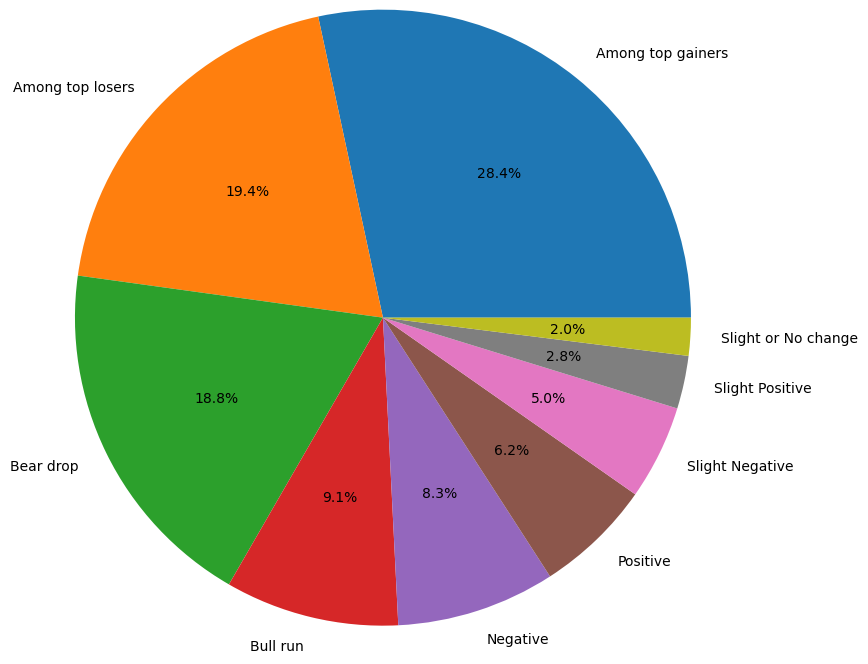

In [43]:
plt.figure(figsize=(20,5))
pie_label = sorted([i for i in df.loc[:, 'Trend'].unique()])
plt.pie(df['Trend'].iloc[-504:].value_counts(), labels = pie_label, autopct = '%1.1f%%', radius = 2)
plt.show()

* For the 2 yeras period, the ADANI Enterprise stock was among the top gainers for about 25.4% of the time, and among the top losers for 22.4 %. 
* For about 8.7% of the time period, the stock has performed positively on a given day. 
* Likewise, for most period of time (about 1.6%) the stock showed a very slight change in the price. These observations are consistent with the daily return histogram we saw in above section.

* By juxtaposing the daily trade volume(in green) with the daily returns(in blue), it was observed that whenever the volume of shares traded is high, there is comparatively high rise or fall in the price of the stock leading to the high returns. 
* Thus, on a given day if unconventionally high volume of trading takes place, then one can expect a big change in the market in the either direction. 
* Volume of shares traded when coupled with the rise or fall in Price of stock, in general, is an indicator of the confidence of the traders & investors in a particular company

**FOr 2 years period**

## **Technical Analysis**
**Technical Indicators**
* Investors usually perform due diligence on a handful of companies to select their target companies. There is no guarantee that an investor will make money and some investors lose some, if not all, of their investments hence it is wise not to invest in a company that is going to go bust or that is overvalued and its share price is already too high.

* Investors usually perform fundamental analysis on a company to understand whether it is worth buying its stock. Once they have selected the chosen companies to invest their money in, they then need to evaluate when to buy the stock. Time is important in stock investing too. This is where the technical indicators can come in handy.

* ***An investor performs technical analysis to compute technical indicators. These indicators can help an investor determine when to buy or sell a stock.***

* There are a large number of technical indicators available that are used by the investors. The key is to use a handful of them that meets the trading strategies of the investors and make sense for the current market situation. Too many indicators can clutter the charts and add unnecessary noise.

* The technical indicators use the OHLCV data. it means the open, high, low, close, and volume of trades. These measures of a stock can be used to compute technical indicators.

* The technical indicators can help us with our investment choices.

* There is a large number of technical indicators available. The technical indicators can be grouped into Momentum Indicators, Volume Indicators, Volatility Indicators, Trend Indicators, and Others Indicators.

### **Crossover Analysis**

A crossover analysis is a technical analysis technique used to identify potential buy and sell signals in a stock's price trend. In the case of ADANIENT.NS, we can use a crossover analysis to identify when the 50-day moving average crosses above or below the 200-day moving average.

<br>

The 50-day moving average represents the average price of the stock over the past 50 days, while the 200-day moving average represents the average price of the stock over the past 200 days. By comparing these two moving averages, we can get a sense of the overall trend of the stock price.

When the 50-day moving average is above the 200-day moving average, it is considered a bullish signal, indicating that the stock price may continue to rise. Conversely, when the 50-day moving average is below the 200-day moving average, it is considered a bearish signal, indicating that the stock price may continue to fall.

<br>
<br>

To perform a crossover analysis, you will need to plot two moving averages for the stock price, typically a shorter-term moving average (e.g. 50-day moving average) and a longer-term moving average (e.g. 200-day moving average). The crossover occurs when the shorter-term moving average crosses above or below the longer-term moving average, indicating a potential trend reversal.

The rolling function is used to calculate the rolling mean (moving average) of the closing price over a specified window size (50 days and 200 days in this example). The fill_between function is used to highlight the regions where the 50-day moving average is above or below the 200-day moving average.

<br><br>

Crossover analysis is just one of many technical analysis tools used to analyze stock prices, and should not be used in isolation to make investment decisions. It's important to also consider fundamental analysis, market trends, and other factors that may affect the stock price.

The crossover points are where the 50-day moving average crosses over or under the 200-day moving average. These points can be used as potential buy or sell signals for the stock, depending on the direction of the crossover.

### **Simple Moving Average Technical Indicator**

* The simple moving average (SMA) is a widely used technical analysis tool that helps smooth out price action by calculating the average price of a security over a specific period of time, usually 20, 50, or 200 days.

* In the case of Adani Enterprises Ltd. (ADANIENT.NS), the simple moving average over the ***last 50 days is calculated to be around 1807.78. This means that the average price of ADANIENT.NS over the last 50 days has been around Rs. 1807.78.***

* The simple moving average is used by traders to identify trend direction and potential support and resistance levels. ***When the price is above the SMA, it is considered bullish, and when it is below the SMA, it is considered bearish.*** In this case, since the price is above the 50-day SMA, it can be considered as bullish.

* One important thing to note about ***SMA*** is that it ***gives equal weightage to all the price points in the time period being considered.*** So, the **more recent prices are given the same weightage as the older prices. *** Therefore, it may not be the most effective tool in volatile markets where prices can fluctuate rapidly.***

* ***The formula for calculating the SMA is as follows:***

* ***SMA = (Sum of prices over a given period) / (Number of prices in that period)***

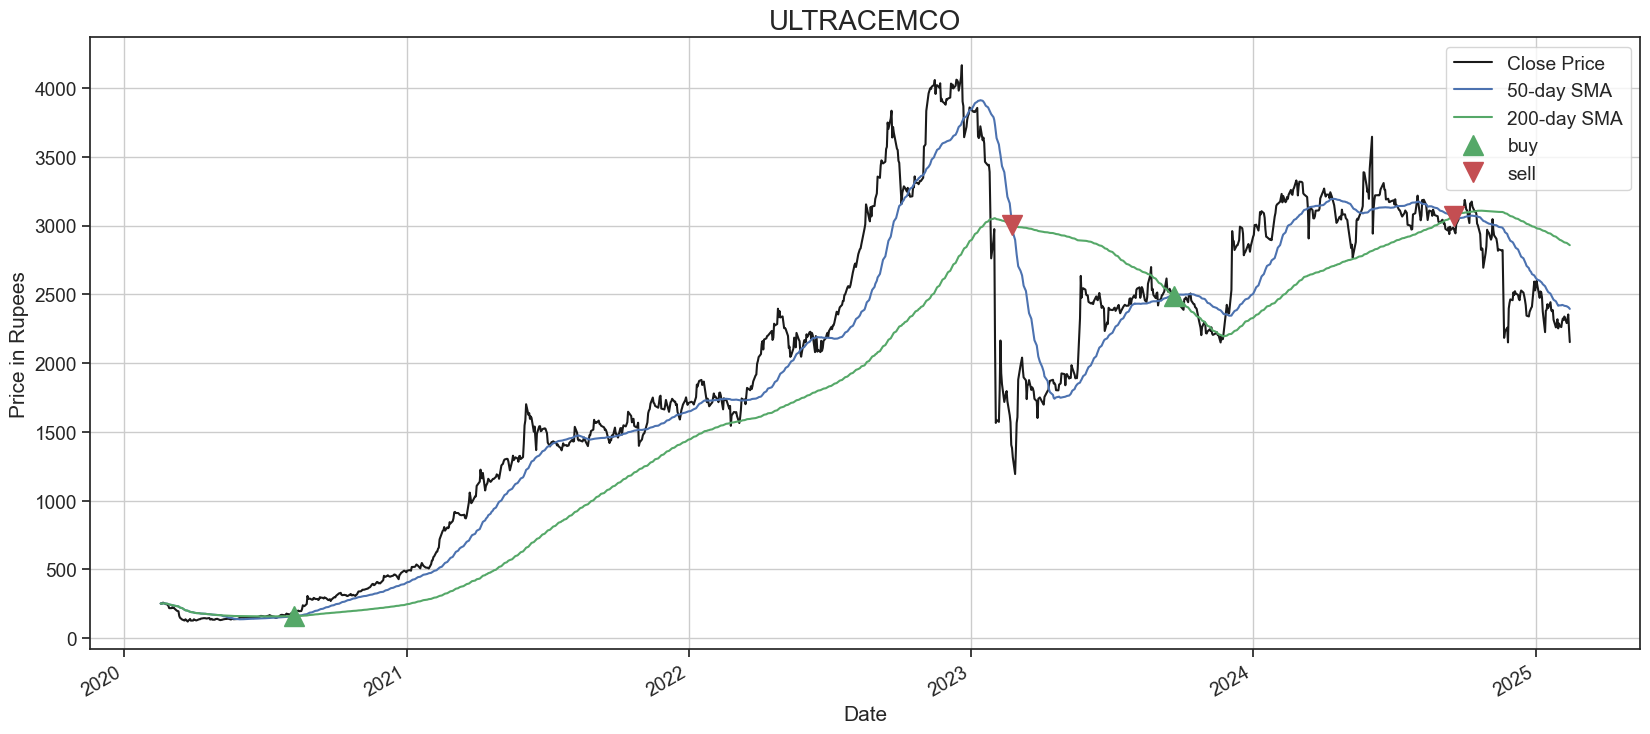

In [53]:
# create 20 days simple moving average column
df['50_SMA'] = df['Close'].rolling(window = 50, min_periods = 1).mean()
# create 50 days simple moving average column
df['200_SMA'] = df['Close'].rolling(window = 200, min_periods = 1).mean()
# display first few rows
df['Signal'] = 0.0
df['Signal'] = np.where(df['50_SMA'] > df['200_SMA'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()
# display first few rows
df.head()
plt.figure(figsize = (20,9))
# plot close price, short-term and long-term moving averages 
df['Close'].plot(color = 'k', label= 'Close Price') 
df['50_SMA'].plot(color = 'b',label = '50-day SMA') 
df['200_SMA'].plot(color = 'g', label = '200-day SMA')
# plot 'buy' signals
plt.plot(df[df['Position'] == 1].index, df['50_SMA'][df['Position'] == 1], '^', markersize = 15, color = 'g', label = 'buy')
# plot 'sell' signals
plt.plot(df[df['Position'] == -1].index, df['200_SMA'][df['Position'] == -1], 'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('ULTRACEMCO', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

### **RSI Technical Indicator**
* RSI stands for Relative Strength Index. It's a widely used technical indicator and this is mainly due to its simplicity. It relies on the market and we can use the indicator to determine when to buy or sell a stock.

* RSI requires us to compute the recent gains and losses. The recent specified time period is subjective in nature. We use the RSI indicator to measure the speed and change of price movements.

* RSI is an oscillating indicator. It can help us understand the momentum better. Note, momentum is the change of price and size. Therefore, the RSI indicator can help us understand when the stock price will change its trend.

* The key to using this indicator is to understand whether a stock is overbought or oversold.

---

**Calculation:**
* The calculation is extremely simple.

  * Firstly, we have to determine the time period. Usually, a 14 day time period is chosen but it could depend on the investor's own view of the market and the stock.
  * Secondly, we have to compute the relative strength which is known as RS. RS is the average gain over the average loss. To explain it further, RS is the average gain when the price was moving up over the average loss when the price change was negative.
  * Calculate RSI as 100 — (100/(1+RS))
  * The RSI value is between 0–100
---
**Strategy:**
* **Overbought:** When the RSI is above 70%. Essentially, overbought is when the price of a stock has increased quickly over a small period of time, implying that it is overbought.
* The price of an overbought stock usually decreases in price.
* **Oversold:** When the RSI is below 30%. Essentially, oversold is when the price of a stock has decreased quickly over a small period of time, implying that it is oversold. The price of an oversold stock usually increases in price.

* There are way too many strategies that are dependent on the RSI indicator.

* A simple strategy is to use the RSI such that:

* **Sell:** When RSI increases above 70%

* **Buy:** When RSI decreases below 30%.

* We might decide to use different parameters. The point is that we can optimize the parameters that meet our trading style, the market and the stock we are interested in.

---

**Key Points**
* The signals are not always accurate. The RSI signals are dependent on the price of the stock only and this is not the only factor that can change the price of a stock. Plus it's highly subjective.

* As an instance, a company can launch a product when a stock is oversold and that could further increase the price of the stock.

* Therefore, always consider the market factors and also use the short and long term price trend when buying or selling a stock.

In [99]:
from ta.momentum import RSIIndicator
# from ta.volatility import BollingerBands

def get_rsi(company):
    close_prices = company['Close']
    # dataframe = company.technical_indicators
    rsi_time_period = 20

    rsi_indicator = RSIIndicator(close_prices, rsi_time_period)
    company['RSI'] = rsi_indicator.rsi()

    low_rsi = 40
    high_rsi = 70

    generate_buy_sell_signals(
        lambda x, company: company['RSI'].values[x] < low_rsi,
        lambda x, company: company['RSI'].values[x] > high_rsi,
    company, 'RSI')

    return company

C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\3053028527.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['RSI'] = rsi_indicator.rsi()
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\3163564876.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[f"{strategy}_Last_Signal"] = np.array(last_signal)
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\3163564876.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

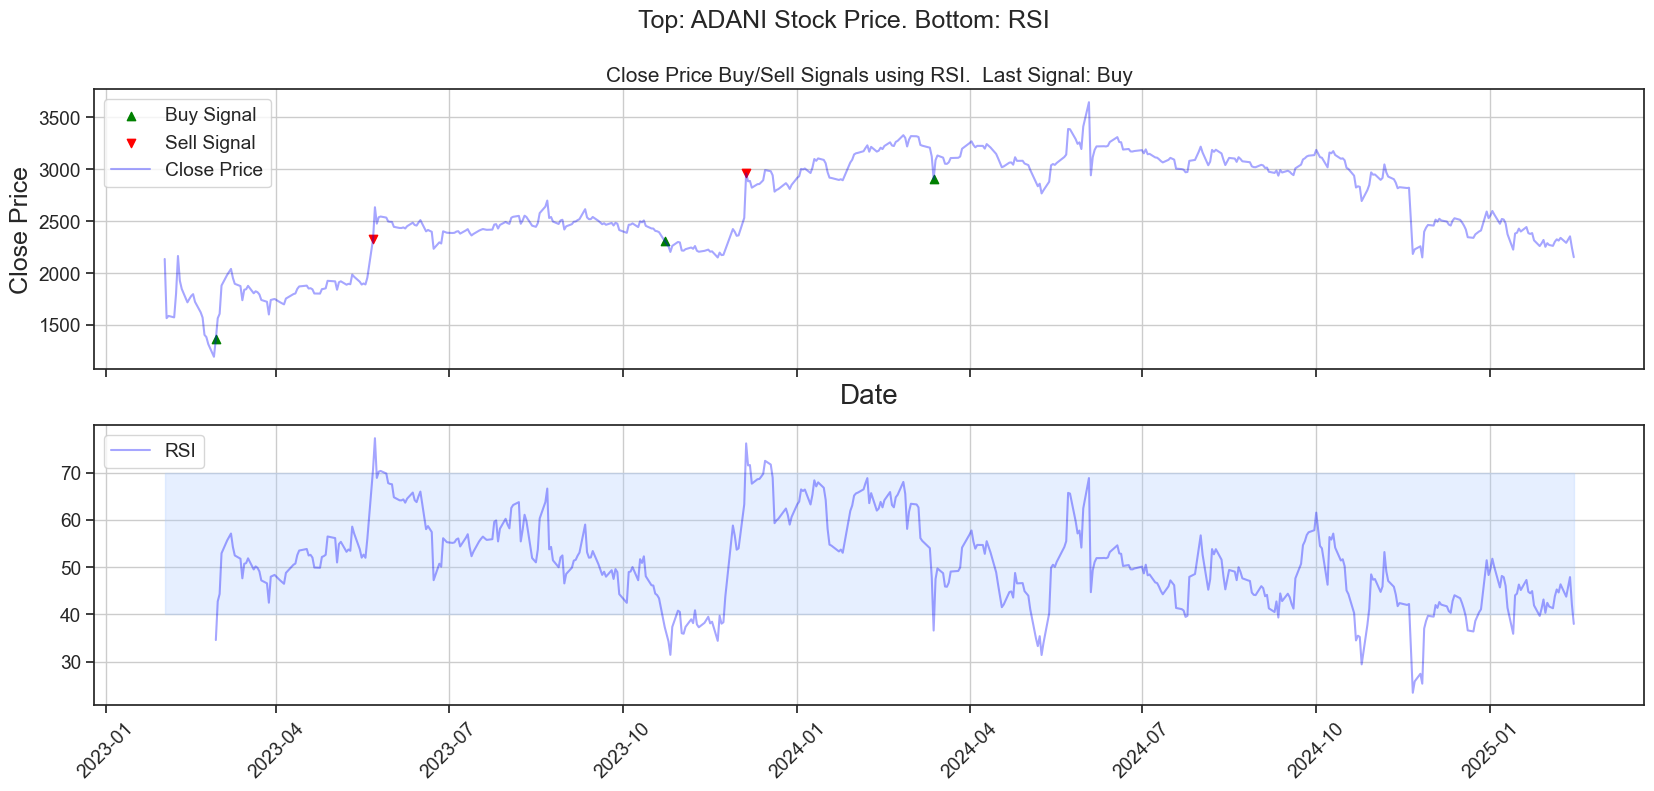

In [100]:
def plot_rsi(company):
      # image = f'images/{company.symbol}_rsi.png'
      rsi = company
      low_rsi = 40
      high_rsi = 70

      #plt.style.use('default')
      fig, axs = plt.subplots(2, sharex=True, figsize=(20, 8))
      plot_price_and_signals(fig, company, rsi, 'RSI', axs)
      axs[1].fill_between(rsi.index, y1=low_rsi, y2=high_rsi, color='#adccff', alpha=0.3)
      axs[1].plot(rsi['RSI'], label='RSI', color='blue', alpha=0.35)
      axs[1].legend(loc='upper left')
      axs[1].grid()
      plt.show()
plot_rsi(get_rsi(df.iloc[-504:]))

### **Bollinger Bands Technical Indicator**
* It is one of the most popular technical indicators. And this is mainly due to its simplicity.

* There are two main components of a Bollinder band indicator:
  1. Volatility Bolinger Bands
  2. Moving averages
---
* **Essentially, the steps are:**
  * Middle band: Calculate the moving average of the price, usually 20 days moving average.
  * Upper band: Calculate two standard deviations above the moving average.
  * Lower band: Calculate two standard deviations below the moving average.

* The more volatile the stock prices, the wider the bands from the moving average. It's important to look at the shape/trend of the bands along with the gap between them to understand the trend and stock better.

* The standard deviations capture the volatile movements and hence we compute standard deviations above and below the upper and lower bands to capture the outliers. Consequently, 95% of the price movements will fall between the two standard deviations
---
* **Strategy:**
* A simple trading strategy could be to:
  * Sell: As soon as the market price touches the upper Bollinger band
  * Buy: As soon as the market price touches the lower Bollinger band

* This is based on the assumption that the stock must fall back (from the uptrend) and eventually touch the bottom band.
* At times, the Bollinger Band Indicator signals us to buy a stock but an external market event such as negative news can change the price of the stock. Therefore it's important to use the indicator as just an indicator that can sometimes be wrong.

In [102]:
from ta.volatility import BollingerBands
def get_bollinger_bands(company):
    close_prices = company['Close']
    # dataframe = company.technical_indicators

    window = 20
    indicator_bb = BollingerBands(close=close_prices, window=window, window_dev=2)

    # Add Bollinger Bands features
    company['Bollinger_Bands_Middle'] = indicator_bb.bollinger_mavg()
    company['Bollinger_Bands_Upper'] = indicator_bb.bollinger_hband()
    company['Bollinger_Bands_Lower'] = indicator_bb.bollinger_lband()

    generate_buy_sell_signals(
        lambda x, company: company['Close'].values[x] < company['Bollinger_Bands_Lower'].values[x],
        lambda x, company: company['Close'].values[x] > company['Bollinger_Bands_Upper'].values[x],
        company, 'Bollinger_Bands')

    return company

C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\1772405333.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Bollinger_Bands_Middle'] = indicator_bb.bollinger_mavg()
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\1772405333.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Bollinger_Bands_Upper'] = indicator_bb.bollinger_hband()
C:\Users\10xTc_Lap-5\AppData\Local\Temp\ipykernel_21992\1772405333.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

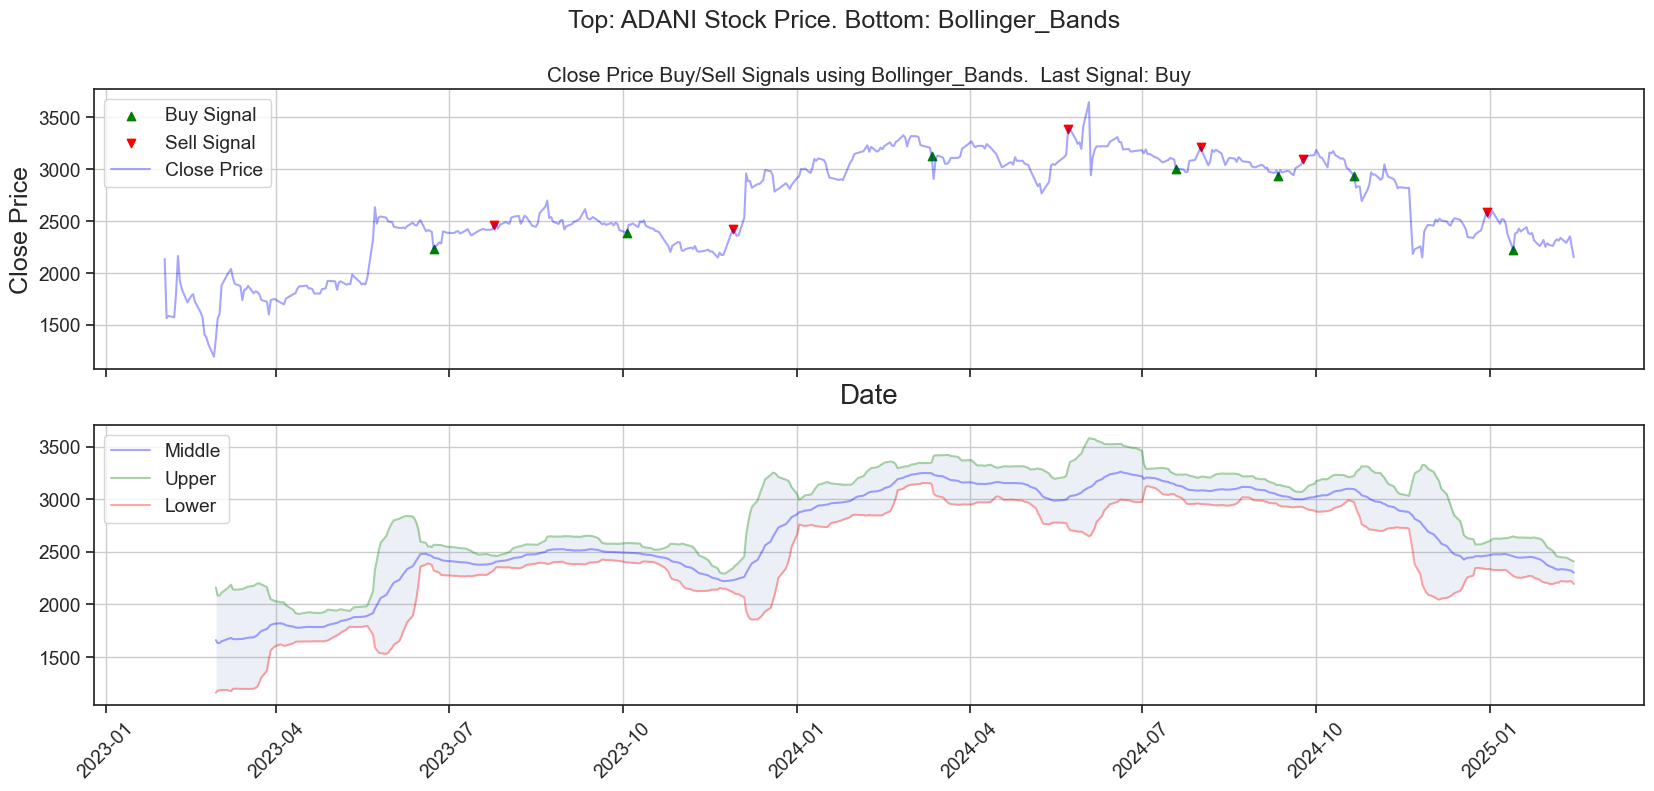

In [64]:
def plot_bollinger_bands(company):
        # image = f'images/{company.symbol}_bb.png'
        bollinger_bands = company

        fig, axs = plt.subplots(2, sharex=True, figsize=(20, 8))
        plot_price_and_signals(fig, company, bollinger_bands, 'Bollinger_Bands', axs)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Middle'], label='Middle', color='blue', alpha=0.35)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Upper'], label='Upper', color='green', alpha=0.35)
        axs[1].plot(bollinger_bands['Bollinger_Bands_Lower'], label='Lower', color='red', alpha=0.35)
        axs[1].fill_between(bollinger_bands.index, bollinger_bands['Bollinger_Bands_Lower'], bollinger_bands['Bollinger_Bands_Upper'], alpha=0.1)
        axs[1].legend(loc='upper left')
        axs[1].grid()

        plt.show()
plot_bollinger_bands(get_bollinger_bands(df.iloc[-504:]))

* The library has a bonus function. We can add all of the available technical indicators that have been coded in the ta library by calling the add_all_ta_features function.

* For this code to work, create a dataframe and ensure it contains the Open, High, Low and Close columns.

In [65]:
# df = add_all_ta_features(df, open="Open", high="High", low="Low", close="Close", volume="Volume_BTC", fillna=True)

In [2]:
!pip install streamlit prophet yfinance plotly

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/12/ff/a04156f4ca3d18bd005c73f79e86e0684346fbc2aea856429c3e49f2828e/prophet-1.1.6-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/2a/80/04b3989f055e555737b3b6944f02112e90cfc4f2e53c763771dded22e684/cmdstanpy-1.2.5-py3-none-any.whl.metadata
  Obtaining dependency information for holidays<1,>=0.25 from https://files.pythonhosted.org/packages/b4/14/f330d47e1363c742e595605bc3575c880204901b3820dcb9e807ea49bcc8/holidays-0.66-py3-none-any.whl.metadata
  Using cached holidays-0.66-py3-none-any.whl.metadata (26 kB)
  Obtaining dependency information for stanio<2.0.0,>=0.4.0 from https://files.pythonhosted.org/packages/56/87/37a80e4d5bd453c33262d8fb618b6840fd98d24ed08e046a4a9b10177fa3/stanio-0.5.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   -----------------------------

Fetching TATA Motors stock data...
[*********************100%***********************]  1 of 1 completed
Data shape: (1240, 2)

First few rows of data:
          ds           y
0 2020-02-14  169.100006
1 2020-02-17  169.100006
2 2020-02-18  161.600006
3 2020-02-19  158.050003
4 2020-02-20  158.500000

Training Prophet model...


13:03:30 - cmdstanpy - INFO - Chain [1] start processing
13:03:31 - cmdstanpy - INFO - Chain [1] done processing



Prophet Model Performance Metrics for TATA Motors:
RMSE: 47.6308
MAE: 40.7766
R2 Score: -0.7004


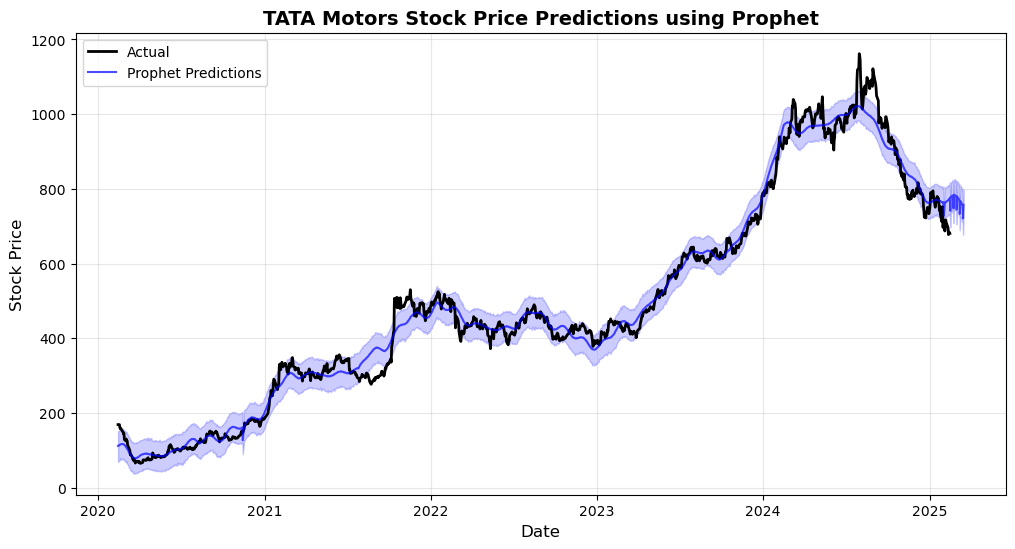

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def fetch_tata_data(period="5y"):
    try:
        df = yf.download("TATAMOTORS.NS", period=period)
        if df.empty or df["Close"].isnull().all():
            raise Exception("TATA Motors stock data is unavailable for this period.")
        df = df.reset_index()[["Date", "Close"]]
        df.columns = ["ds", "y"]  # Prophet requires columns named 'ds' and 'y'
        return df
    except Exception as e:
        print(f"Error fetching TATA Motors data: {e}")
        return None

def evaluate_predictions(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print("\nProphet Model Performance Metrics for TATA Motors:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    
    return rmse, mae, r2

def predict_prophet(df, future_periods=30):
    model = Prophet()
    model.fit(df)
    
    future = model.make_future_dataframe(periods=future_periods)
    forecast = model.predict(future)
    return forecast

def plot_predictions(df, forecast):
    plt.figure(figsize=(12, 6))
    plt.plot(df['ds'], df['y'], label='Actual', color='black', linewidth=2)
    plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Predictions', color='blue', alpha=0.7)
    
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2)
    
    plt.title('TATA Motors Stock Price Predictions using Prophet', fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Stock Price', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

def main():
    print("Fetching TATA Motors stock data...")
    df = fetch_tata_data()
    if df is None:
        return
    
    print(f"Data shape: {df.shape}")
    print("\nFirst few rows of data:")
    print(df.head())
    
    print("\nTraining Prophet model...")
    forecast = predict_prophet(df)
    
    # Evaluate predictions
    actual = df['y'].values[-30:]
    predicted = forecast['yhat'].values[-30:]
    evaluate_predictions(actual, predicted)
    
    # Plot results
    plot_predictions(df, forecast)

if __name__ == "__main__":
    main()


In [2]:
!pip install yfinance numpy pandas scikit-learn xgboost statsmodels tensorflow matplotlib


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 1.3 MB/s eta 0:01:58
   ---------------------------------------- 0.4/150.0 MB 6.4 MB/s eta 0:00:24
   ---------------------------------------- 0.9/150.0 MB 8.0 MB/s eta 0:00:19
   ---------------------------------------- 1.2/150.0 MB 7.9 MB/s eta 0:00:19
   ---------------------------------------- 1.8/150.0 MB 8.6 MB/s eta 0:00:18
    --------------------------------------- 2.2/150.0 MB 8.7 MB/s eta 0:00:17
    --------------------------------------- 2.7/150.0 MB 9.6 MB/s eta 0:00:16
    --------------------------------------- 3.2/150.0 MB 9.6 MB/s eta 0:00:16
    --------------------------------------- 3.6/150.0 MB 9.3 MB/s eta 0:00:16
   - -------------------------------------- 4.1/150.0 MB 9.4 MB/s eta 0:00:16
   - -------------------------------------- 4.6/150.0 MB 9.6 MB/s eta 0:00:16
   - -------------------------------------- 5.1/150.0 MB 9.8 MB/s eta 0

In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def fetch_data(ticker="ADANIENT.NS", period="5y"):
    try:
        df = yf.download(ticker, period=period)
        if df.empty or df["Close"].isnull().all():
            raise Exception("Stock data is unavailable for this period.")
        return df
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def prepare_data(df, feature='Close', train_size=0.8):
    data = df[feature].values.reshape(-1, 1)
    scaler = MinMaxScaler()
    data_scaled = scaler.fit_transform(data)
    
    train_size = int(len(data_scaled) * train_size)
    train_data = data_scaled[:train_size]
    test_data = data_scaled[train_size:]
    
    return train_data, test_data, scaler

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length)])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

def evaluate_predictions(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{model_name} Performance Metrics:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R2 Score: {r2:.4f}")
    
    return rmse, mae, r2

def predict_arima(train_data, test_data):
    model = ARIMA(train_data, order=(5,1,2))
    results = model.fit()
    
    forecast = results.forecast(steps=len(test_data))
    return forecast

def predict_sarima(train_data, test_data):
    model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    results = model.fit()
    
    forecast = results.forecast(steps=len(test_data))
    return forecast

def predict_lstm(train_data, test_data, seq_length=60):
    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)
    
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(seq_length, 1), return_sequences=True),
        Dropout(0.2),
        LSTM(50, activation='relu'),
        Dropout(0.2),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
    
    predictions = model.predict(X_test)
    return predictions, y_test

def predict_xgboost(train_data, test_data, seq_length=60):
    X_train, y_train = create_sequences(train_data, seq_length)
    X_test, y_test = create_sequences(test_data, seq_length)
    
    X_train = X_train.reshape(X_train.shape[0], -1)
    X_test = X_test.reshape(X_test.shape[0], -1)
    
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1
    )
    
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions, y_test

def plot_predictions(actual, predictions_dict, title):
    plt.figure(figsize=(15, 7))
    plt.plot(actual, label='Actual', color='black')
    
    colors = ['blue', 'red', 'green', 'purple']
    for (model_name, predictions), color in zip(predictions_dict.items(), colors):
        plt.plot(predictions, label=f'{model_name} Predictions', color=color, alpha=0.7)
    
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Stock Price (Scaled)')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    # Fetch data
    df = fetch_data()
    if df is None:
        return
    
    # Prepare data
    train_data, test_data, scaler = prepare_data(df)
    
    # ARIMA predictions
    arima_pred = predict_arima(train_data, test_data)
    
    # SARIMA predictions
    sarima_pred = predict_sarima(train_data, test_data)
    
    # LSTM predictions
    lstm_pred, lstm_actual = predict_lstm(train_data, test_data)
    
    # XGBoost predictions
    xgb_pred, xgb_actual = predict_xgboost(train_data, test_data)
    
    # Evaluate all models
    predictions_dict = {
        'ARIMA': arima_pred,
        'SARIMA': sarima_pred,
        'LSTM': lstm_pred.flatten(),
        'XGBoost': xgb_pred
    }
    
    # Calculate metrics for all models
    metrics = {}
    for model_name, predictions in predictions_dict.items():
        metrics[model_name] = evaluate_predictions(test_data[-len(predictions):], 
                                                predictions, 
                                                model_name)
    
    # Plot results
    plot_predictions(test_data[-len(xgb_pred):], predictions_dict,
                    'Adani Stock Price Predictions - Model Comparison')

if __name__ == "__main__":
    main()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADANIENT.NS: No data found for this date range, symbol may be delisted
Error fetching data: Stock data is unavailable for this period.
